In [310]:
import cv2
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt

In [311]:
data=[]
label=[]

with open('cleaned_data.csv') as f:
    reader=csv.reader(f)
    next(reader)
    for row in reader:
        if row:
            label.append(int(row[0]))
            data.append([int(x) for x in row[1:]])


data = np.array(data) 
label = np.array(label)

permutation = np.random.permutation(len(data))

data = data[permutation]
label = label[permutation]

# print(data.shape)  
# print(label.shape)  

# print(data[0].shape)
print(data)
# print(label)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


465


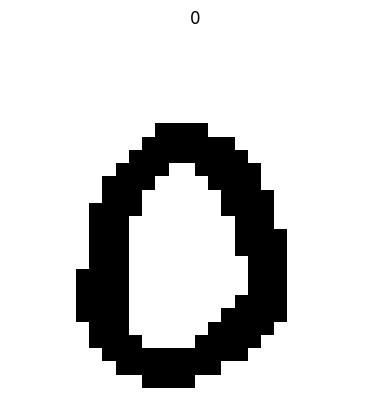

In [312]:
idx = np.random.randint(0, len(data))
print(idx)
data_reshaped = data[idx].reshape(28, 28)
# print(data_reshaped)

f,axes=plt.subplots(1,1)
axes.imshow(data_reshaped, cmap=plt.cm.binary, interpolation='nearest')
axes.set_title(label[idx])
axes.axis('off')
 
plt.show()


In [313]:
print(data.shape)
print(label.shape)

(1000, 784)
(1000,)


In [314]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')


Training set size: 800
Testing set size: 200


Creating a 2 detector

In [315]:
y_train_2=(y_train==3).astype(int)
print(y_train_2)

[0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 

In [316]:
from sklearn.linear_model import LogisticRegression

In [317]:
clf=LogisticRegression()
clf.fit(X_train, y_train_2)


LogisticRegression()

In [318]:
predictions=clf.predict(X_test)
print(predictions)
print("Accuracy: ", clf.score(X_test, (y_test==3).astype(int)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy:  0.985


In [319]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(clf, data, (label==3).astype(int), cv=5)
print(scores)

[0.98  0.985 0.99  0.98  0.975]


In [320]:
test_data=data[28]
test_label=label[28]
# print((label==3).astype(int))
print(test_label)
print(clf.predict([test_data]))


1
[0]


In [321]:
from sklearn.dummy import DummyClassifier
clf_2=DummyClassifier()
y_train_3=(y_train==51).astype(int)
clf_2.fit(X_train, y_train_3)
predictions_2=clf_2.predict(X_test)
print(predictions_2)
print("Accuracy: ", clf_2.score(X_test, (y_test==2).astype(int)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy:  0.91
